In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_cora_sim = pd.read_csv('cora_cosine_weights1.csv')

In [3]:
df_cora_sim.describe()

,source,target,weight
count,5278.000000,5278.000000,5278.000000
mean,890.505305,1727.952065,0.990581
std,637.685260,603.645683,0.009513
min,0.000000,2.000000,0.933941
25%,347.000000,1351.250000,0.989425
50%,776.000000,1817.500000,0.994031
75%,1358.000000,2187.000000,0.995931
max,2706.000000,2707.000000,0.999939


In [4]:
df_nodes=pd.read_csv('cora_labels.csv')

In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_cora['weight'] = scaler.fit_transform(df_cora[['weight']])#
#df_cora.head()

In [6]:
df_cora = df_cora_sim[['source','target','weight']]
df_cora['weight']= 1 - df_cora['weight']


In [7]:
cora_graph= nx.from_pandas_edgelist(df_cora, 'source', 'target', create_using=nx.DiGraph())

In [8]:
cora_graph.number_of_edges()

5278

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_cora, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_cora_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_cora

In [11]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [12]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

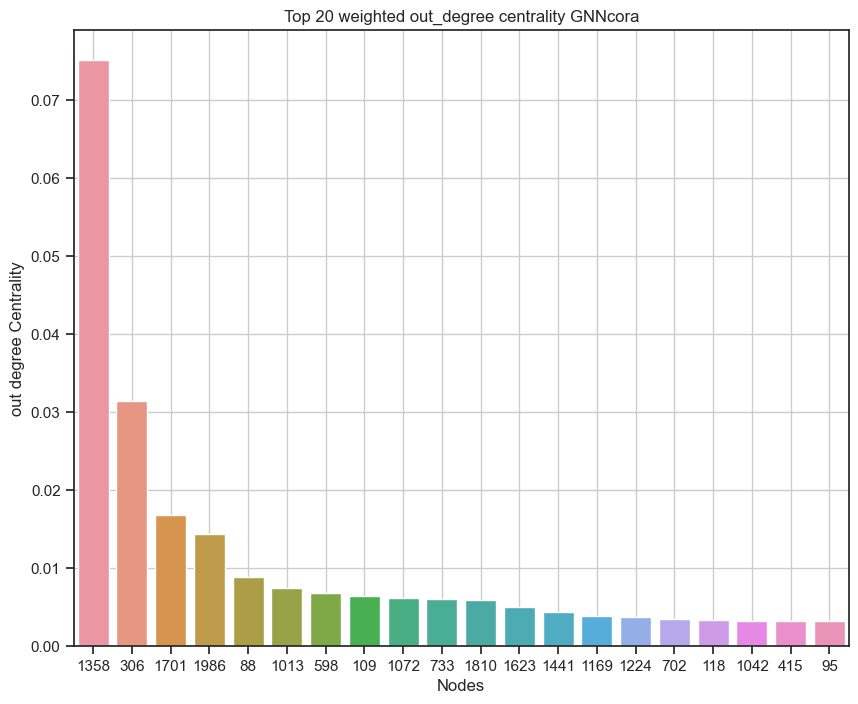

In [13]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNcora')
plt.grid()
plt.show()

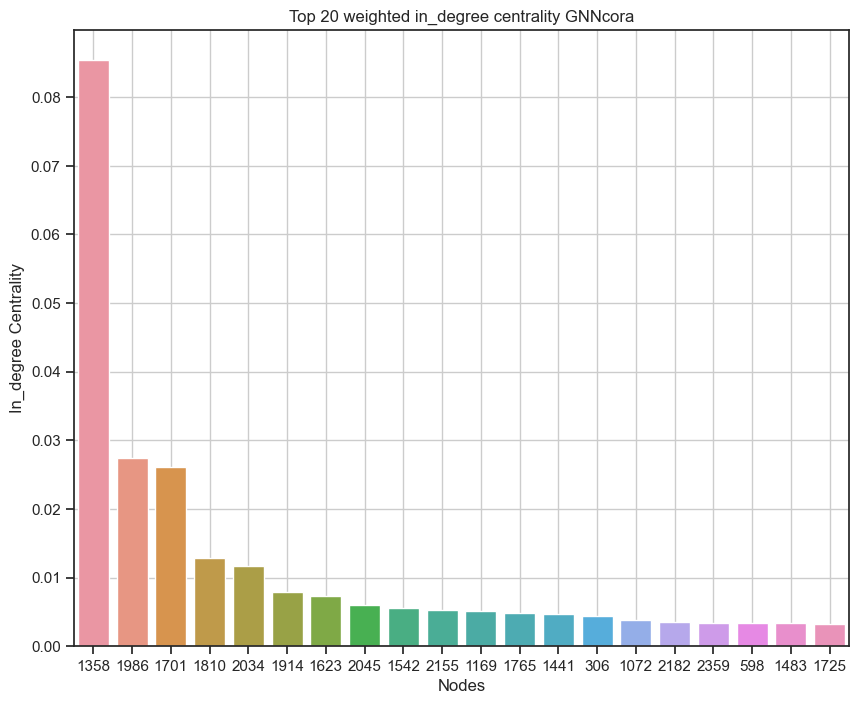

In [14]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNcora')
plt.grid()
plt.show()

## cora graph

In [15]:
cora_out_degree = weighted_out_degree(cora_graph)
cora_in_degree = weighted_in_degree(cora_graph)

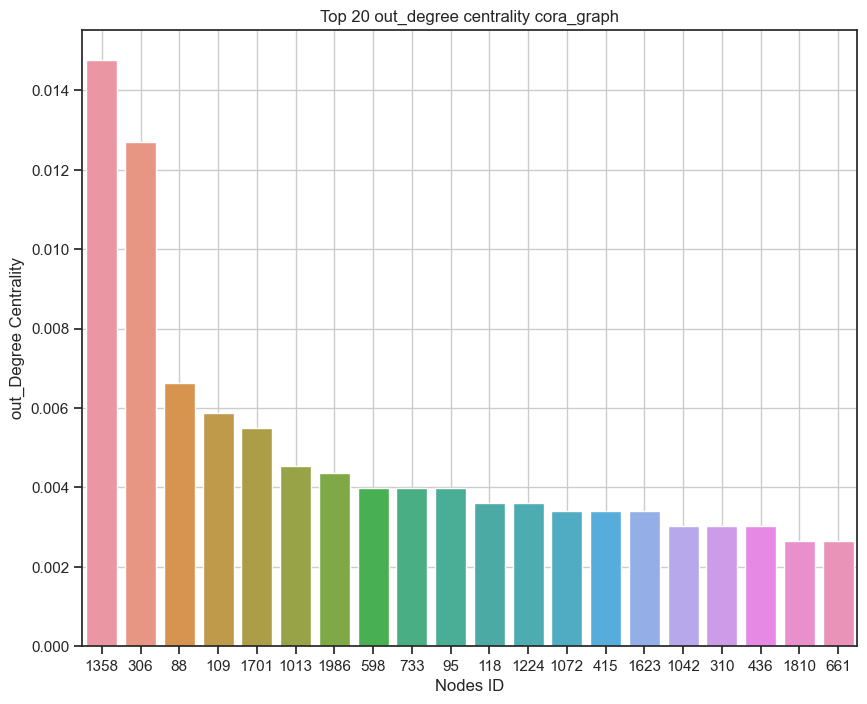

In [16]:

keys = list(map(str,list(cora_out_degree.keys())[:20]))
values = list(cora_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality cora_graph')
plt.grid()
plt.show()

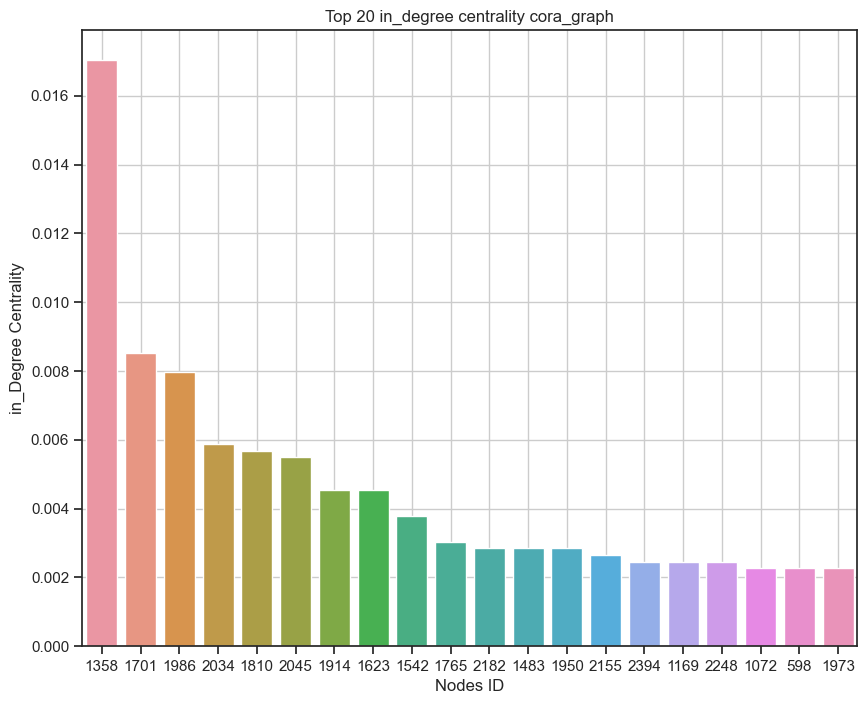

In [17]:
keys = list(map(str,list(cora_in_degree.keys())[:20]))
values = list(cora_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality cora_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_cora

In [18]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

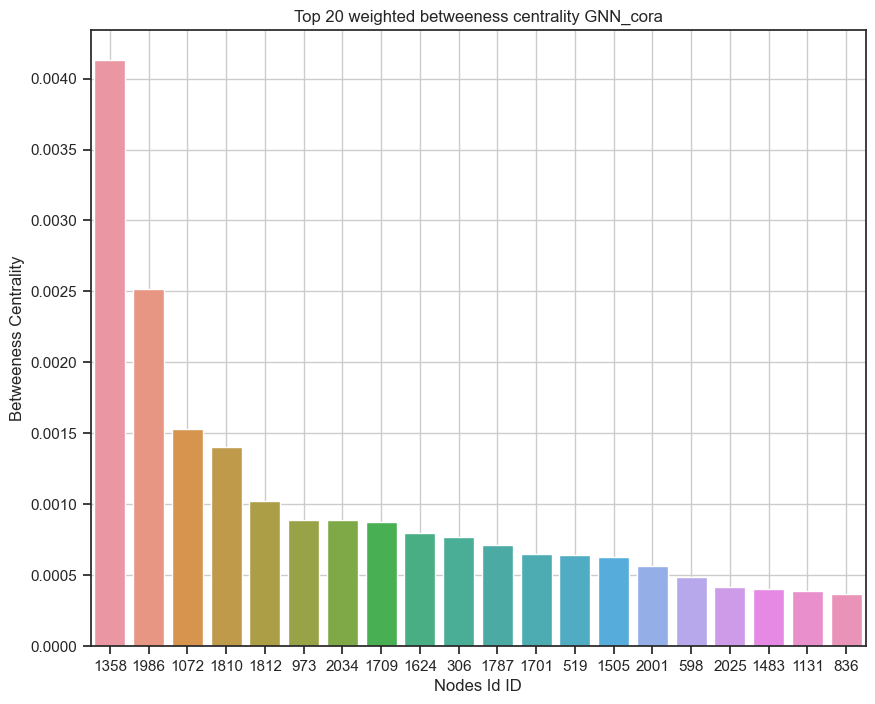

In [19]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [20]:
bet_cora_graph = nx.betweenness_centrality(cora_graph)

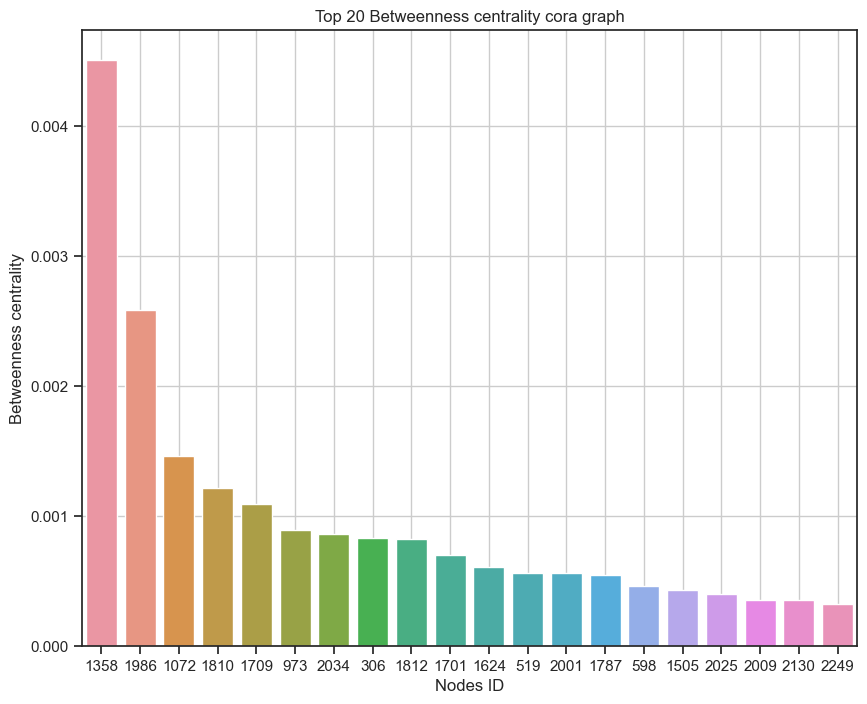

In [21]:
bet_cora_graph = dict(sorted(bet_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_cora_graph.keys())[:20]))
values = list(bet_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality cora graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_cora

In [22]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

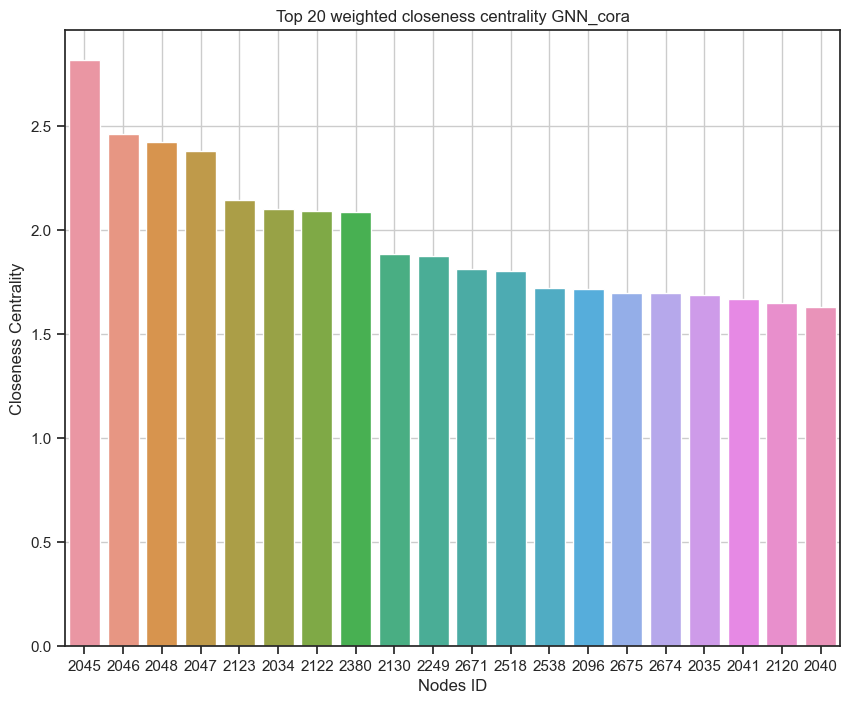

In [23]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_cora')
plt.grid()
plt.show()

## cora

In [24]:
closeness_cora_graph = nx.closeness_centrality(cora_graph)

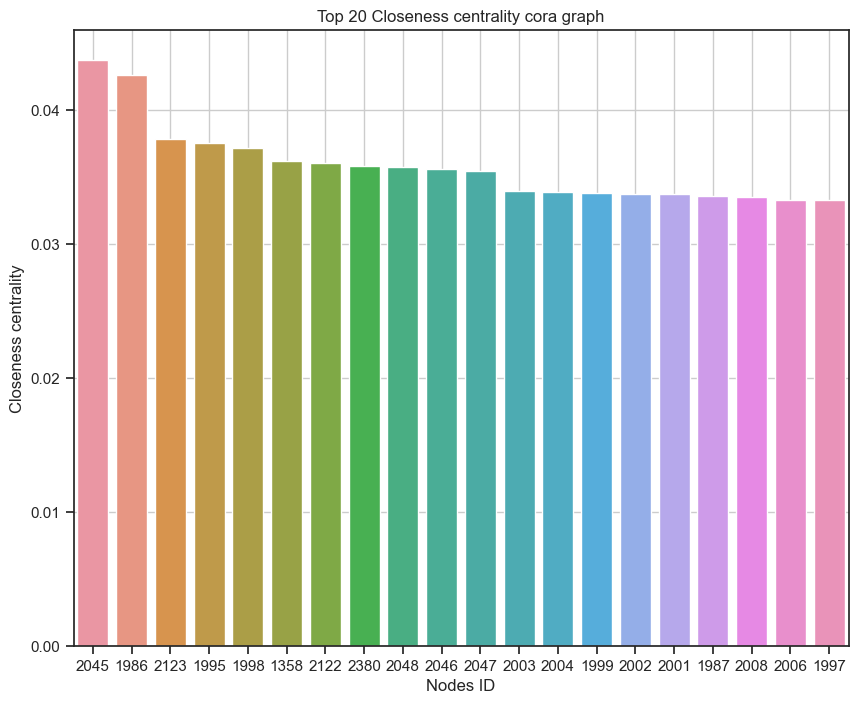

In [25]:
closeness_cora_graph = dict(sorted(closeness_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_cora_graph.keys())[:20]))
values = list(closeness_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality cora graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_cora

In [26]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

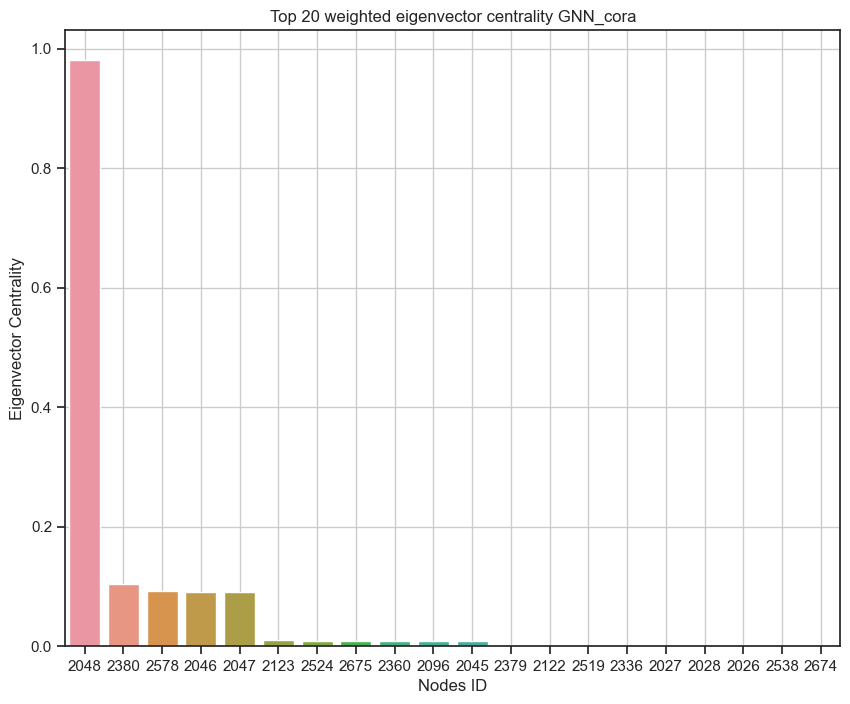

In [27]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [28]:
eigen_cora_graph = nx.eigenvector_centrality(cora_graph, max_iter = 1000)

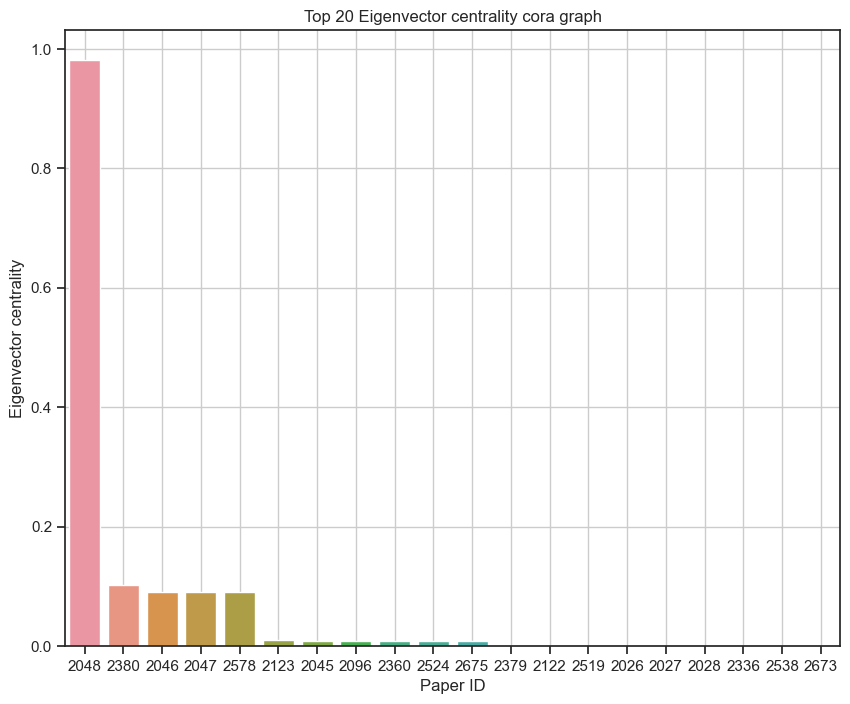

In [29]:
eigen_cora_graph = dict(sorted(eigen_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_cora_graph.keys())[:20]))
values = list(eigen_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality cora graph')
plt.grid()
plt.show()

# Efficiency

In [30]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [31]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.391

In [32]:
weighted_global_efficiency(cora_graph)

0.004

## Modularity

In [33]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [34]:
print(weighted_modularty(GNN_sim))

0.81


In [35]:
print(weighted_modularty(cora_graph))

0.807


# Community

In [36]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_cora = greedy_modularity_communities(cora_graph)

In [37]:
print(len(comm_GNN))
print(len(comm_cora))

107
109


In [65]:
comm_cora[43]

frozenset({439, 1642, 2657, 2658})

In [64]:
comm_GNN[43]

frozenset({117, 259, 2537})

In [66]:
for c in range(len(comm_GNN)):
    print(len(comm_GNN[c]),len(comm_cora[c]),jaccard(comm_GNN[c], comm_cora[c]))

385 367 0.8942065491183879
381 286 0.0030075187969924814
201 229 0.0
184 222 0.0
168 216 0.013192612137203167
167 197 0.0
160 154 0.0
159 110 0.01509433962264151
92 92 0.00546448087431694
91 87 0.0
75 84 0.8928571428571429
64 82 0.013888888888888888
51 55 0.0
50 55 0.0
41 29 0.0
32 29 0.0
28 27 0.0
27 26 0.0
26 26 0.0
25 25 1.0
21 14 0.0
13 13 1.0
13 13 1.0
11 12 0.9166666666666666
9 9 0.0
9 9 0.0
8 9 0.0
8 8 0.0
8 8 0.0
7 8 0.0
6 8 0.0
6 6 0.0
5 6 0.0
5 5 0.0
5 5 0.0
4 5 0.0
4 5 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
3 4 0.0
3 4 0.0
3 3 0.0
3 3 0.0
3 3 0.0
3 3 0.0
3 3 0.0
2 3 0.0
2 3 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0

In [39]:
for com in comm_GNN:
    print(len(com))

385
381
201
184
168
167
160
159
92
91
75
64
51
50
41
32
28
27
26
25
21
13
13
11
9
9
8
8
8
7
6
6
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [40]:
for com in comm_cora:
    print(len(com))

367
286
229
222
216
197
154
110
92
87
84
82
55
55
29
29
27
26
26
25
14
13
13
12
9
9
9
8
8
8
8
6
6
5
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [41]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [42]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [43]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_cora = [gini_index(i,labels) for i in comm_cora]
#scipy.stats.wilcoxon(gini_GNN, gini_cora)

In [44]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_cora))

mannwhitneyu MannwhitneyuResult(statistic=5702.0, pvalue=0.7136257342733697)


In [45]:
df_nodes['label'].unique()

array([3, 4, 0, 2, 1, 5, 6], dtype=int64)

<AxesSubplot:>

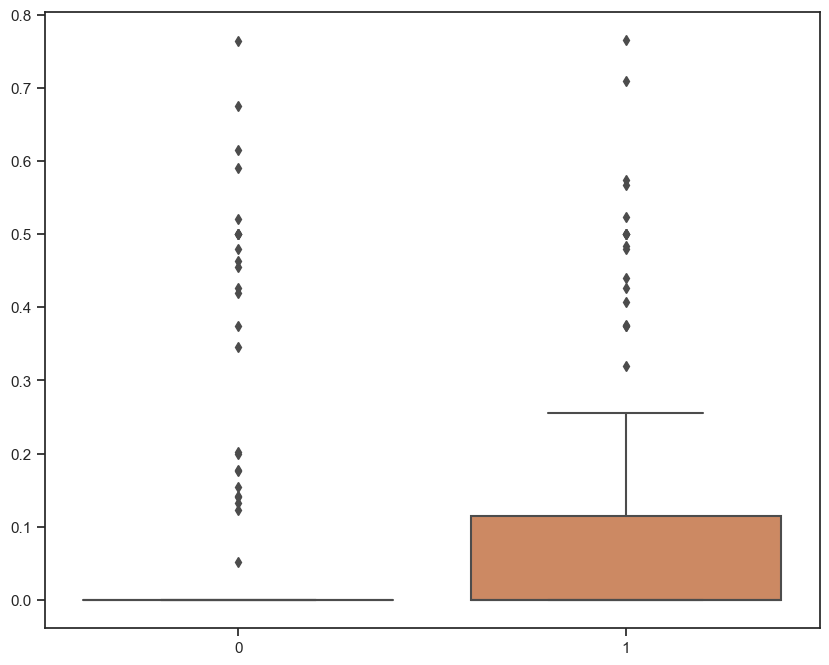

In [46]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_cora]

sns.boxplot(data=all_arr, )

In [47]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.09

In [48]:
gini=0
clusters = comm_cora
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.097

In [49]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(cora_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.0032323232323232328
p_value 0.9619952877414877
Jaccard Index: 0.42857142857142855
[1358, 306, 1701, 1986, 88, 1013, 598, 109, 1072, 733, 1810, 1623, 1441, 1169, 1224, 702, 118, 1042, 415, 95, 2034, 1015, 687, 310, 1131, 436, 963, 645, 657, 734, 1542, 154, 1103, 1119, 1725, 661, 429, 456, 1914, 748, 239, 1229, 1070, 539, 507, 1149, 441, 371, 831, 155, 1040, 1515, 1692, 111, 68, 350, 524, 434, 2001, 73, 59, 52, 30, 823, 12, 244, 1340, 151, 94, 337, 833, 1628, 335, 218, 552, 580, 215, 689, 364, 454, 341, 55, 1367, 1416, 754, 1041, 72, 1624, 1145, 357, 797, 201, 501, 873, 43, 1709, 565, 519, 968, 1453]
[1358, 306, 88, 109, 1701, 1013, 1986, 598, 733, 95, 118, 1224, 1072, 415, 1623, 1042, 310, 436, 1810, 661, 1131, 429, 963, 507, 55, 239, 73, 154, 645, 1015, 1441, 1103, 2001, 94, 687, 218, 350, 1229, 1119, 59, 65, 89, 734, 1169, 1542, 577, 748, 657, 505, 2034, 279, 33, 48, 1309, 74, 1624, 487, 454, 525, 316, 364, 1050, 1257, 490, 702, 1416, 1703, 36, 210, 1628, 456, 736, 102, 133, 5

In [50]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(cora_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.01575757575757576
p_value 0.8163103639580351
Jaccard Index: 0.3986013986013986
[1358, 1986, 1701, 1810, 2034, 1914, 1623, 2045, 1542, 2155, 1169, 1765, 1441, 306, 1072, 2182, 2359, 598, 1483, 1725, 1013, 2450, 2130, 1740, 1413, 973, 2367, 1950, 1734, 1692, 2291, 1826, 1973, 1416, 733, 2248, 2394, 1894, 2365, 1869, 1367, 963, 1733, 1729, 1732, 441, 2080, 1966, 2597, 1719, 1720, 1927, 2238, 1710, 1741, 1761, 2451, 1714, 1785, 1713, 1735, 1718, 2645, 1742, 2358, 1759, 1616, 1745, 1703, 2309, 1444, 1799, 1715, 1042, 1754, 1224, 1731, 1760, 1728, 1628, 1480, 2126, 1716, 1538, 1721, 656, 1749, 1748, 1763, 2383, 1708, 2400, 1384, 1604, 1620, 1776, 1568, 1737, 1723, 2025]
[1358, 1701, 1986, 2034, 1810, 2045, 1914, 1623, 1542, 1765, 2182, 1483, 1950, 2155, 2394, 1169, 2248, 1072, 598, 1973, 1441, 1413, 2450, 1966, 306, 973, 1692, 1894, 2130, 2464, 1416, 2367, 1013, 2080, 1927, 2451, 2359, 2383, 2671, 1703, 2238, 1725, 1628, 2122, 1776, 2025, 1742, 1869, 1740, 2083, 2176, 733, 2054, 2199,

In [51]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.020606060606060607
p_value 0.7613047144799054
Jaccard Index: 0.8348623853211009
[1358, 1986, 1072, 1810, 1812, 973, 2034, 1709, 1624, 306, 1787, 1701, 519, 1505, 2001, 598, 2025, 1483, 1131, 836, 2130, 2009, 2249, 1873, 454, 1224, 935, 1742, 236, 1914, 1103, 1169, 1070, 1013, 728, 441, 2045, 1623, 2671, 2040, 644, 1894, 1740, 985, 733, 1655, 1229, 1725, 1703, 1107, 1721, 1735, 1776, 1154, 387, 2026, 231, 687, 1920, 1927, 854, 1416, 2027, 1929, 2335, 876, 1583, 1996, 1739, 760, 1196, 1987, 1042, 596, 1968, 869, 1902, 139, 581, 1542, 1464, 109, 1038, 1728, 1599, 2122, 1149, 1708, 1062, 567, 1749, 963, 1441, 1924, 1926, 1525, 1849, 1301, 873, 1061]
[1358, 1986, 1072, 1810, 1709, 973, 2034, 306, 1812, 1701, 1624, 519, 2001, 1787, 598, 1505, 2025, 2009, 2130, 2249, 836, 1131, 1013, 1914, 1224, 1070, 935, 441, 728, 454, 2045, 2671, 1623, 644, 733, 2040, 985, 1894, 1725, 1229, 1703, 1740, 1873, 671, 1776, 1920, 231, 1416, 1927, 387, 1169, 2026, 1038, 2027, 687, 2335, 1742, 1929, 1483,

In [52]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_cora_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.2947368421052632
p_value 0.07402572925713644
Jaccard Index: 0.21212121212121213
[2045, 2046, 2048, 2047, 2123, 2034, 2122, 2380, 2130, 2249, 2671, 2518, 2538, 2096, 2675, 2674, 2035, 2041, 2120, 2040]
[2045, 1986, 2123, 1995, 1998, 1358, 2122, 2380, 2048, 2046, 2047, 2003, 2004, 1999, 2002, 2001, 1987, 2008, 2006, 1997]


In [53]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.568888888888889
p_value 5.01354294420052e-17
Jaccard Index: 0.9801980198019802
[2048, 2380, 2578, 2046, 2047, 2123, 2524, 2675, 2360, 2096, 2045, 2379, 2122, 2519, 2336, 2027, 2028, 2026, 2538, 2674, 2673, 2672, 2685, 2004, 2003, 2002, 2063, 2064, 2326, 2477, 2335, 2509, 2412, 2301, 2378, 2121, 2381, 2044, 2348, 2025, 2325, 2637, 2518, 2671, 2364, 2405, 2452, 2552, 1996, 2001, 2006, 1987, 1997, 2042, 1998, 2008, 2000, 1999, 1994, 1988, 1995, 1993, 2007, 2009, 1990, 2005, 1992, 1989, 1991, 2120, 2249, 2110, 2649, 2328, 2189, 2052, 2051, 2458, 1980, 2178, 2375, 2451, 2306, 1986, 1950, 2130, 2041, 2035, 2040, 2039, 2038, 2036, 2037, 2118, 2109, 1798, 2327, 1926, 2310, 2422]
[2048, 2380, 2046, 2047, 2578, 2123, 2045, 2096, 2360, 2524, 2675, 2379, 2122, 2519, 2026, 2027, 2028, 2336, 2538, 2673, 2674, 2672, 2685, 2004, 2003, 2002, 2326, 2325, 2509, 2025, 2335, 2348, 2301, 2063, 2412, 2477, 2381, 2121, 2064, 2044, 2378, 2518, 2671, 2637, 2364, 2405, 2452, 1998, 1995, 1987, 1999, 2009, 